### Imports & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

project_root = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
data_path = project_root / "data" / "discord_cleaned.csv"

df = pd.read_csv(data_path)
df.head()


,label,msg_content,msg_timestamp,usr_joined_at,time_since_join,message_length,word_count,has_link,has_mention,num_roles
0,0,@Lemons make me verified,1.610000e+12,1.660000e+12,5.147476e+07,24.0,4.0,0.0,0.0,3
1,0,basically that timedrame we all got purged,1.750000e+12,1.670000e+12,8.493882e+07,42.0,7.0,0.0,0.0,8
2,0,no one plays livik,1.630000e+12,1.660000e+12,5.147476e+07,18.0,4.0,0.0,0.0,3
3,0,bro like my character dont even need to aim rho,1.740000e+12,1.670000e+12,7.338343e+07,47.0,10.0,0.0,0.0,8
4,0,Does anyone here want to buy popularity?,1.740000e+12,1.720000e+12,2.012908e+07,40.0,7.0,0.0,0.0,1


# SafePlayAI – Discord Phishing EDA

## Results-driven Analytical Method

1. **Understand the problem:** Children receive phishing/scam messages on Discord.
2. **Start at the end:** Reduce exposure to scam messages by improving detection performance.
3. **Identify resources:** Discord chat history (`discord.csv`) including labels and message features.
4. **Obtain and prepare data:** Use `data_prep.py` to clean and engineer features.
5. **Do the work:** Explore data distributions, relationships, correlations and class balance.
6. **Present minimum viable answer:** Visual patterns + model experiment summary.
7. **Iterate if necessary:** Tune features, sampling strategies, and models.


### Class balance and basic stats

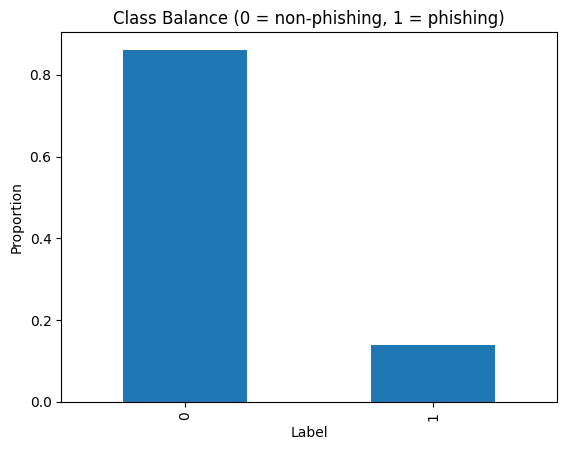

,label,msg_timestamp,usr_joined_at,time_since_join,message_length,word_count,has_link,has_mention,num_roles
count,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.139000,1.719485e+12,1.660080e+12,6.017534e+07,55.874500,10.343500,0.063500,0.082000,3.518000
std,0.346033,4.867103e+10,4.897339e+10,5.168183e+07,56.069418,9.424007,0.243921,0.274433,2.143822
min,0.000000,1.610000e+12,1.500000e+12,-3.355251e+07,7.000000,4.000000,0.000000,0.000000,1.000000
25%,0.000000,1.740000e+12,1.650000e+12,2.787916e+07,36.000000,7.000000,0.000000,0.000000,2.000000
50%,0.000000,1.740000e+12,1.660000e+12,5.147476e+07,43.000000,8.000000,0.000000,0.000000,3.000000
75%,0.000000,1.740000e+12,1.670000e+12,8.395145e+07,58.000000,10.000000,0.000000,0.000000,4.000000
max,1.000000,1.750000e+12,1.750000e+12,2.539162e+08,776.000000,145.000000,1.000000,1.000000,11.000000


In [2]:
df["label"].value_counts(normalize=True).plot(kind="bar")
plt.title("Class Balance (0 = non-phishing, 1 = phishing)")
plt.xlabel("Label")
plt.ylabel("Proportion")
plt.show()

df.describe()


### Feature distributions

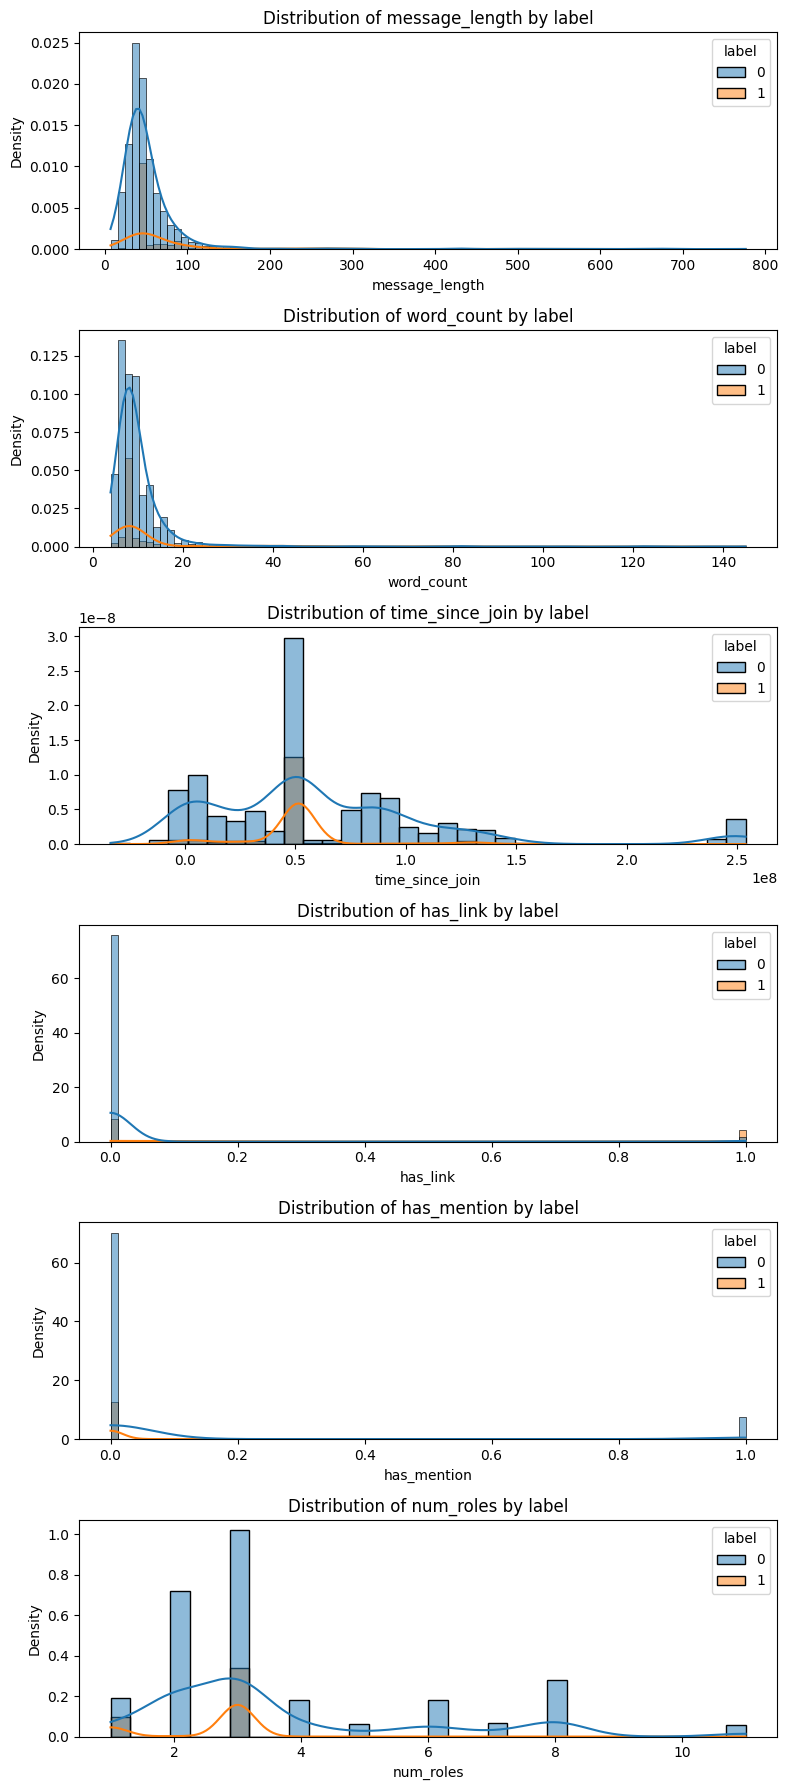

In [3]:
numeric_cols = ["message_length", "word_count", "time_since_join", "has_link", "has_mention", "num_roles"]

fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 3 * len(numeric_cols)))
for ax, col in zip(axes, numeric_cols):
    sns.histplot(data=df, x=col, hue="label", kde=True, ax=ax, stat="density")
    ax.set_title(f"Distribution of {col} by label")
plt.tight_layout()
plt.show()


### Correlation heatmap

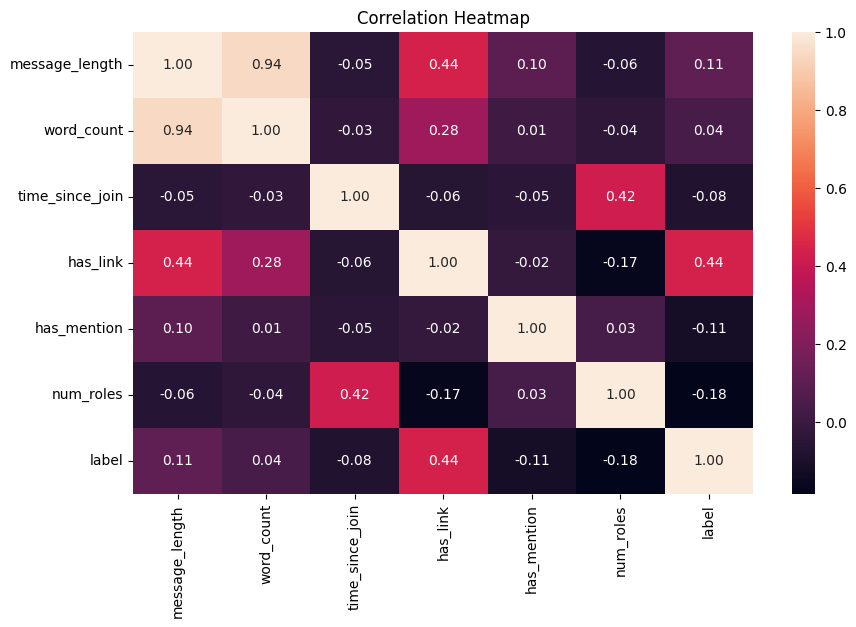

In [4]:
plt.figure(figsize=(10, 6))
corr = df[numeric_cols + ["label"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### link to experiment results

In [5]:
from pathlib import Path

results_path = project_root / "outputs" / "ab_test_results.csv"
results = pd.read_csv(results_path)
results


,model,accuracy,precision,recall,f1,cv_f1_mean,cv_f1_std
0,Model_A_numeric_only,0.895,0.818182,0.321429,0.461538,0.403976,0.056877
1,Model_B_numeric_plus_text,0.930,0.850000,0.607143,0.708333,0.679750,0.015930


### Conclusion

## Experiment Summary & Hypothesis Evaluation

- **Model A** used only numeric features.
- **Model B** used numeric + TF-IDF text features from `msg_content`.
- We compared Accuracy, Precision, Recall, and F1.
- We ran a **t-test** on cross-validated F1 scores:

**Null Hypothesis (H₀):** Model B does not significantly improve F1.  
**Alternative (H₁):** Model B significantly improves F1.

Based on the p-value printed by `experiment_ab_test.py`:

- If `p < 0.05` → Reject H₀ → the additional text features significantly improve phishing detection.
- If `p ≥ 0.05` → Fail to reject H₀ → there is no statistically significant improvement.

These results support the design of a SafePlayAI tool that flags risky Discord messages
using both numeric metadata and message text features.
